
# **Imports:**

In [217]:
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf
# import tensorflow_datasets as tfds
# from tensorflow.keras import layers
# from google.colab import files
# import os
# import copy
# import cv2
# import random
# from sklearn import model_selection
# from sklearn import preprocessing
# import numpy as np
# import keras
# from keras import layers
# import tensorflow as tf
# from tensorflow import keras
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import image
# import cv2
# import os
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input, LSTM
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
# import os
# from sklearn.preprocessing import MinMaxScaler

In [218]:
import requests
import math
import datetime
import matplotlib.pyplot as plt


# **Methods:**

In [219]:
def url_generator(stock_index: str, interval: str, yyyy_mm_dd: str) -> str:
  return f"https://stooq.pl/q/a2/d/?s={stock_index}&i={interval}&f={yyyy_mm_dd}"

def parse_stock_data(txt_data: str) -> list:
  lista = txt_data.split()
  ret = []
  for x in lista:
    a = x.split(',')
    ret.append({"Date":a[0], "Time":a[1], "Open":float(a[2]), "High":float(a[3]), "Low":float(a[4]), "Close":float(a[5])})
  return ret

In [220]:
def calc_arithmetic_mean(tmp_data):
  sum = 0
  for a in tmp_data:
    sum += a
  return sum / len(tmp_data)

def format_number(liczba):
  return f"{liczba:.2f}"


In [221]:
def get_prediction(tmp_y_data, tmp_batch_size):
  init_mean = calc_arithmetic_mean(tmp_y_data[:tmp_batch_size])
  list_of_predictions = [init_mean for i in range(0,tmp_batch_size)]

  for i in range(0, len(tmp_y_data)-tmp_batch_size):
    tmp = tmp_y_data[i:i+tmp_batch_size]
    list_of_predictions.append(calc_arithmetic_mean(tmp))
  return list_of_predictions

In [222]:
def get_operations(stooq_vals, predictions, batch_size: int, size_of_single_operation: int):
  operations = []
  money = 0
  number_of_stock = 0

  stooq_vals = stooq_vals[batch_size:]
  predictions = predictions[batch_size:]

  for i in range(len(stooq_vals)):
    stock_last_val =  stooq_vals[i]
    predicted_val = predictions[i]

    operation = 0
    if stock_last_val < predicted_val:                                  # buy
      nm_of_pos_stocks = int(size_of_single_operation / stock_last_val)
      money -= stock_last_val * nm_of_pos_stocks
      number_of_stock += nm_of_pos_stocks
      operation = 1 * predicted_val

    if stock_last_val > predicted_val:                                  # sell
      nm_of_pos_stocks = int(size_of_single_operation / stock_last_val)
      money += stock_last_val * nm_of_pos_stocks
      number_of_stock -= nm_of_pos_stocks
      operation = -1 * predicted_val

    # print([operation, money+(number_of_stock*stock_last_val)])
    operations.append([operation, money+(number_of_stock*stock_last_val)])
  return operations


# **Data:**

In [223]:
now = datetime.datetime.now()
stock_index = "usdpln"
yyyy_mm_dd = f"{now.year:04d}{now.month:02d}{now.day:02d}"
url = url_generator(stock_index, "d", yyyy_mm_dd)
print(url)
resp = requests.get(url)
row_list = parse_stock_data(resp.text)

stooq_vals = [x["Close"] for x in row_list]



https://stooq.pl/q/a2/d/?s=usdpln&i=d&f=20240321


In [224]:
train_y_data = stooq_vals[:int(len(stooq_vals)/3)]
test_y_data = stooq_vals[int(len(stooq_vals)/3):]


# **Parameters:**

In [225]:
batch_size = 20



# **Predictions:**

stooq_vals     : ['3.77', '3.79', '3.76', '3.79', '3.81', '3.79', '3.74', '3.76', '3.74', '3.77', '3.75', '3.73', '3.73', '3.70', '3.71', '3.67', '3.69', '3.67', '3.66', '3.69', '3.68', '3.68', '3.66', '3.65', '3.65', '3.67', '3.66', '3.66', '3.67', '3.67', '3.67', '3.72', '3.72', '3.73', '3.77', '3.83', '3.83', '3.80', '3.78', '3.79', '3.79', '3.78', '3.77', '3.80', '3.81', '3.81', '3.80', '3.80', '3.82', '3.84', '3.84', '3.83', '3.84', '3.89', '3.86', '3.88', '3.88', '3.90', '3.90', '3.88', '3.88', '3.89', '3.89', '3.89', '3.88', '3.84', '3.85', '3.84', '3.84', '3.84', '3.84', '3.89', '3.89', '3.90', '3.90', '3.90', '3.87', '3.87', '3.90', '3.89', '3.93', '3.92', '3.90', '3.89', '3.89', '3.89', '3.88', '3.87', '3.83', '3.81', '3.80', '3.79', '3.81', '3.81', '3.82', '3.84', '3.85', '3.85', '3.85', '3.86', '3.88', '3.91', '3.93', '3.94', '3.95', '3.93', '3.93', '3.93', '3.97', '3.99', '3.98', '3.95', '3.96', '3.97', '3.94', '3.97', '3.98', '3.97', '3.98', '3.95', '3.94', '3.94', '3.95'

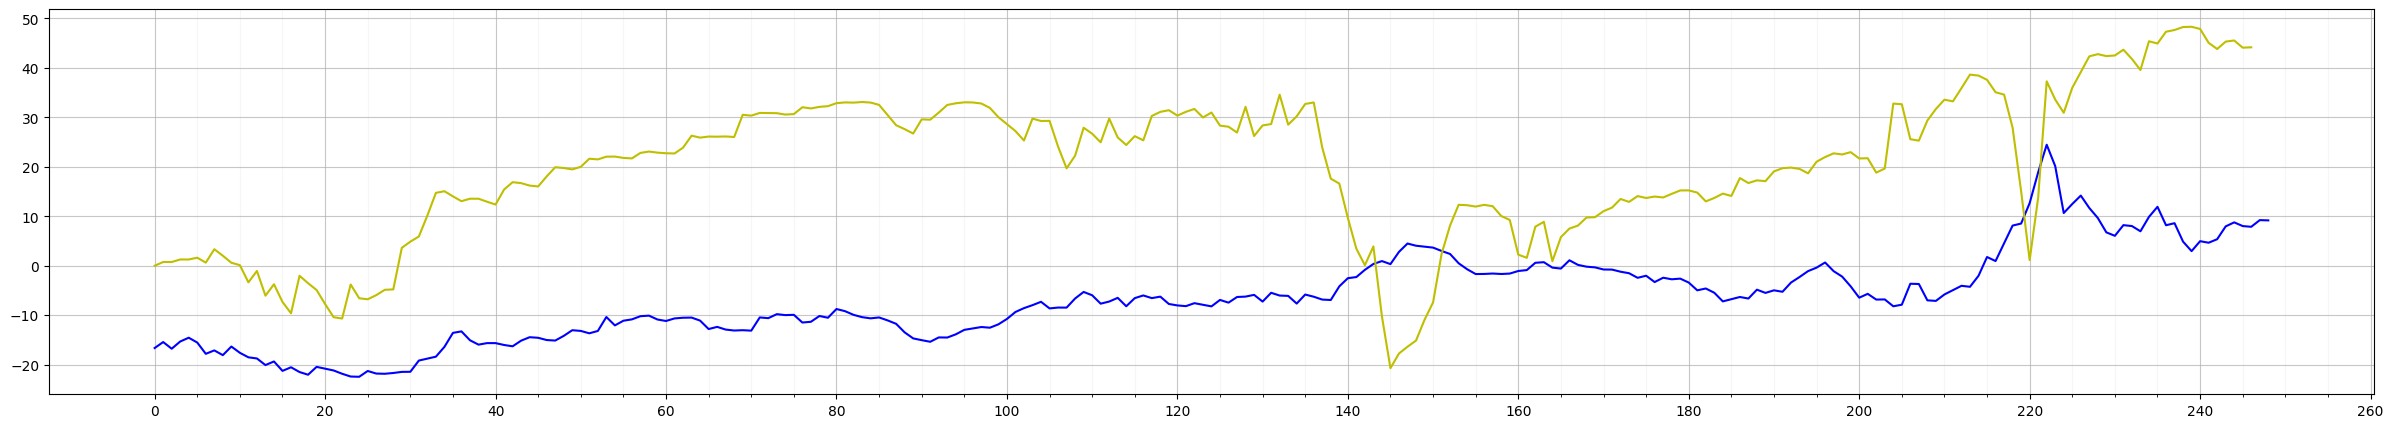

In [232]:
train_y_data = stooq_vals[:int(len(stooq_vals)/3)]
test_y_data = stooq_vals[int(len(stooq_vals)/3):]

ccc = 50
batch_size = 2
size_of_single_operation = 100
operations = []

predictions  = get_prediction(train_y_data, batch_size)
operations_b = get_operations(train_y_data, predictions, batch_size, size_of_single_operation)   # [operation, money]
operations = [a[0] for a in operations_b]
money = [a[1] for a in operations_b]


print(f"stooq_vals     : {list(map(format_number, stooq_vals))}")
print(f"predictions    : {list(map(format_number, predictions))}")
print(f"operations     :   {list(map(format_number, operations))}")
print(f"money          :   {list(map(format_number, money))}")

plt.rcParams["figure.figsize"] = (30,5)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0, len(stooq_vals)+1, 20)
minor_ticks = np.arange(0, len(stooq_vals)+1, 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.7)

limit = -1
train_y_data = [(x-4.1)*50 for x in train_y_data]

plt.plot(train_y_data[:limit], c="b")
plt.plot(money[:limit], c="y")

In [247]:
train_y_data = stooq_vals[:int(len(stooq_vals)/3)]
test_y_data = stooq_vals[int(len(stooq_vals)/3):]

max_val = [0, 0, 0]   # [money, batch_size, size_of_single_operation]

for batch_size in range(1,100):
  for size_of_single_operation in range(100,2000,100):

    predictions = get_prediction(train_y_data, batch_size)
    operations_b = get_operations(train_y_data, predictions, batch_size, size_of_single_operation)   # [operation, money]
    money = [a[1] for a in operations_b][-1]

    if money > max_val[0]:
      max_val[0] = money
      max_val[1] = batch_size
      max_val[2] = size_of_single_operation

print(f"money         :   {max_val}")

money         :   [2198.425239999995, 1, 1900]


money          :   -10888.64


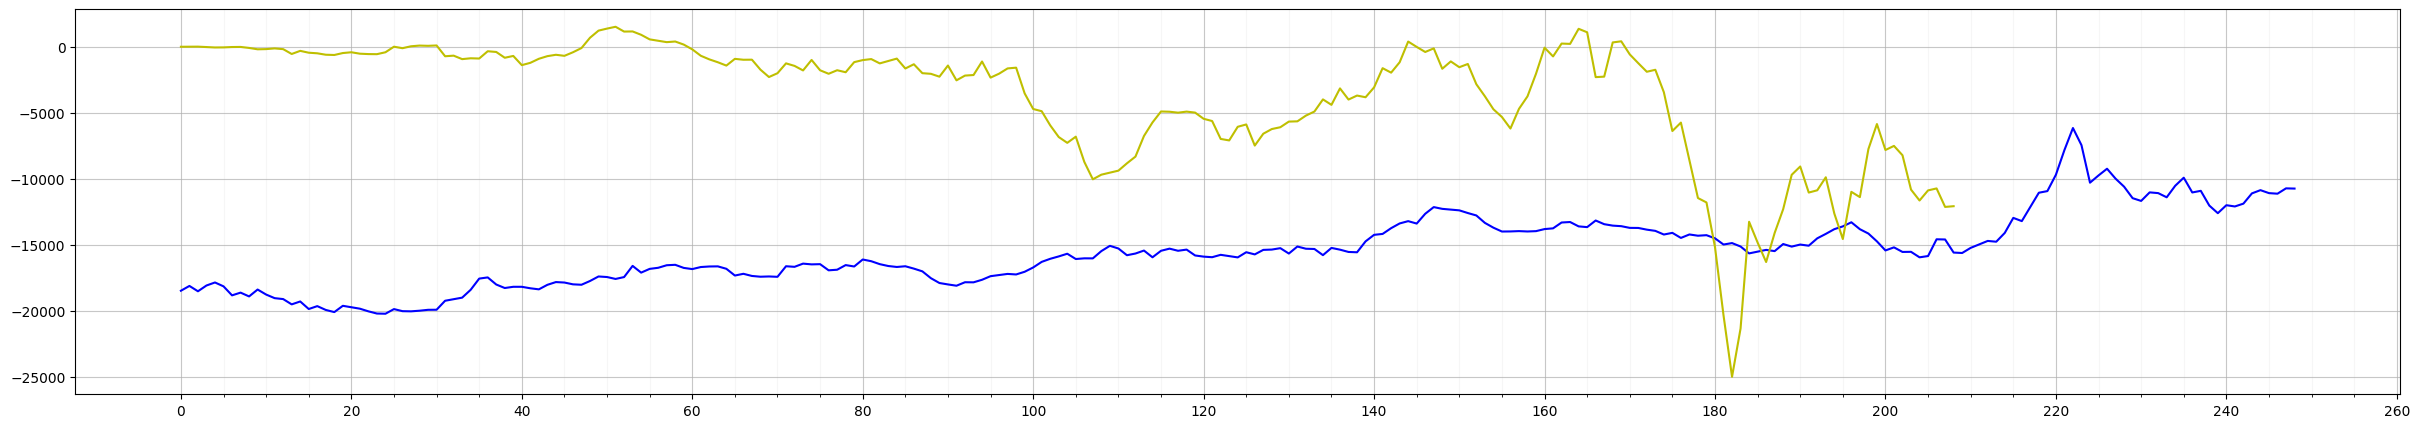

In [256]:
train_y_data = stooq_vals[:int(len(stooq_vals)/3)]
test_y_data = stooq_vals[int(len(stooq_vals)/3):]

batch_size = 40
size_of_single_operation = 1900
operations = []

predictions  = get_prediction(train_y_data, batch_size)
operations_b = get_operations(train_y_data, predictions, batch_size, size_of_single_operation)   # [operation, money]
operations = [a[0] for a in operations_b]
money = [a[1] for a in operations_b]

print(f"money          :   {list(map(format_number, money))[-1]}")

plt.rcParams["figure.figsize"] = (30,5)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0, len(stooq_vals)+1, 20)
minor_ticks = np.arange(0, len(stooq_vals)+1, 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.7)

limit = -1
train_y_data = [(x-5)*15000 for x in train_y_data]
plt.plot(train_y_data[:limit], c="b")
plt.plot(money[:limit], c="y")

money          :   11835.56


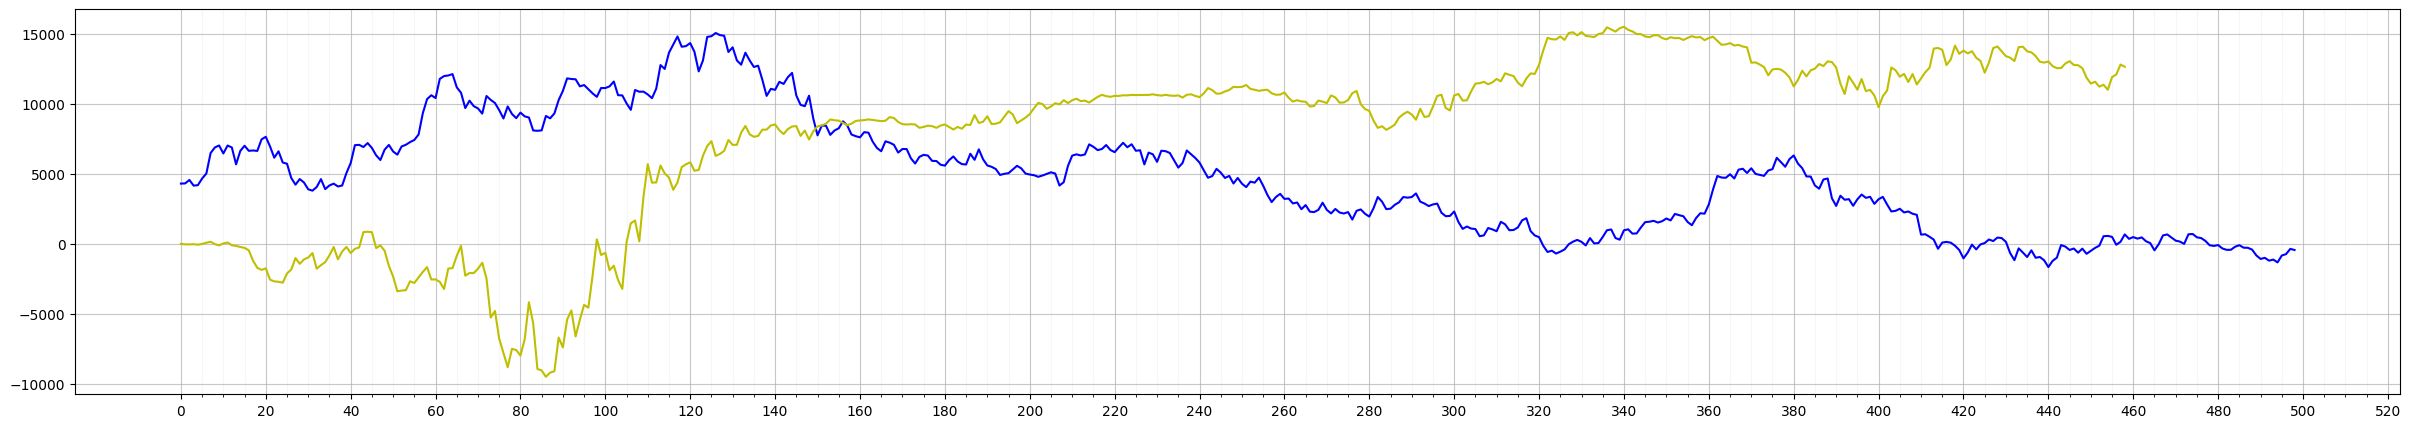

In [252]:
train_y_data = stooq_vals[:int(len(stooq_vals)/3)]
test_y_data = stooq_vals[int(len(stooq_vals)/3):]

batch_size = 40
size_of_single_operation = 1900
operations = []

predictions  = get_prediction(test_y_data, batch_size)
operations_b = get_operations(test_y_data, predictions, batch_size, size_of_single_operation)   # [operation, money]
operations = [a[0] for a in operations_b]
money = [a[1] for a in operations_b]


# print(f"stooq_vals     : {list(map(format_number, stooq_vals))}")
# print(f"predictions    : {list(map(format_number, predictions))}")
# print(f"operations     :   {list(map(format_number, operations))}")
print(f"money          :   {list(map(format_number, money))[-1]}")

plt.rcParams["figure.figsize"] = (30,5)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0, len(stooq_vals)+1, 20)
minor_ticks = np.arange(0, len(stooq_vals)+1, 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.7)

limit = -1
train_y_data = [(x-4)*15000 for x in test_y_data]
plt.plot(train_y_data[:limit], c="b")
plt.plot(money[:limit], c="y")


# **Print:**

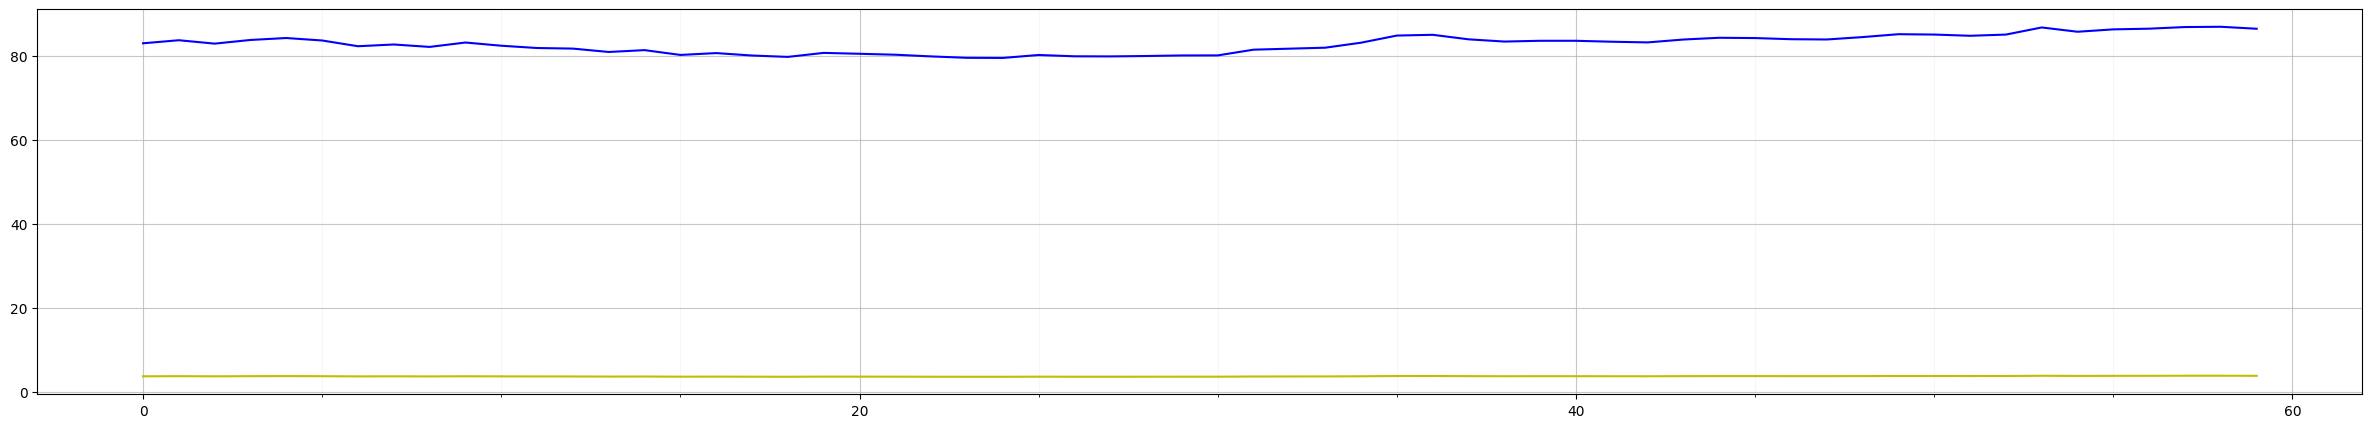

In [207]:
plt.rcParams["figure.figsize"] = (30,5)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0, len(stooq_vals)+1, 20)
minor_ticks = np.arange(0, len(stooq_vals)+1, 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.7)

limit = 60
plt.plot(train_y_data[:limit], c="b")
plt.plot(stooq_vals[:limit], c="y")


# **Tests:**

In [208]:
stooq_vals = [i+1 for i in range(10)]
batch_size = 3

result = get_prediction(stooq_vals, batch_size)
answare = [2, 2, 2, 2, 3, 4, 5, 6, 7, 8]

# print(list(map(format_number, stooq_vals)))
print(list(map(format_number, answare)))
print(list(map(format_number, result)))
print(f"Test works:  {list(map(format_number, answare)) ==  list(map(format_number, result))}")

['2.00', '2.00', '2.00', '2.00', '3.00', '4.00', '5.00', '6.00', '7.00', '8.00']
['2.00', '2.00', '2.00', '2.00', '3.00', '4.00', '5.00', '6.00', '7.00', '8.00']
Test works:  True


In [209]:
stooq_vals = [i+1 for i in range(10)]
batch_size = 4

result = get_prediction(stooq_vals, batch_size)
answare = [2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]

# print(list(map(format_number, stooq_vals)))
print(list(map(format_number, answare)))
print(list(map(format_number, result)))
print(f"Test works:  {list(map(format_number, answare)) ==  list(map(format_number, result))}")

['2.50', '2.50', '2.50', '2.50', '2.50', '3.50', '4.50', '5.50', '6.50', '7.50']
['2.50', '2.50', '2.50', '2.50', '2.50', '3.50', '4.50', '5.50', '6.50', '7.50']
Test works:  True


In [210]:
size_of_single_operation = 100
money = 0
number_of_stock = 0
operations = []               # 1 = buy    -1 = sell

In [211]:
ccc = 50
batch_size = 2
size_of_single_operation = 100
operations = []

stooq_vals = [(math.sin(i*3.14*10/ccc)+10) for i in range(ccc)]
predictions = get_prediction(stooq_vals, batch_size)

operations_b = get_operations(stooq_vals, predictions, batch_size, size_of_single_operation)   # [operation, money]
operations = [a[0] for a in operations_b]
money = [a[1] for a in operations_b]


print(f"stooq_vals     : {list(map(format_number, stooq_vals))}")
print(f"predictions    : {list(map(format_number, predictions))}")
print(f"operations     :   {list(map(format_number, operations))}")
print(f"money         :   {list(map(format_number, money))}")

stooq_vals     : ['10.00', '10.59', '10.95', '10.95', '10.59', '10.00', '9.41', '9.05', '9.05', '9.41', '10.00', '10.58', '10.95', '10.95', '10.59', '10.00', '9.42', '9.05', '9.05', '9.41', '9.99', '10.58', '10.95', '10.95', '10.59', '10.01', '9.42', '9.05', '9.05', '9.40', '9.99', '10.58', '10.95', '10.95', '10.60', '10.01', '9.42', '9.05', '9.05', '9.40', '9.99', '10.58', '10.95', '10.96', '10.60', '10.01', '9.42', '9.05', '9.04', '9.40']
predictions    : ['10.29', '10.29', '10.29', '10.77', '10.95', '10.77', '10.30', '9.71', '9.23', '9.05', '9.23', '9.70', '10.29', '10.77', '10.95', '10.77', '10.30', '9.71', '9.23', '9.05', '9.23', '9.70', '10.29', '10.77', '10.95', '10.77', '10.30', '9.71', '9.24', '9.05', '9.23', '9.70', '10.29', '10.76', '10.95', '10.78', '10.30', '9.72', '9.24', '9.05', '9.22', '9.69', '10.28', '10.76', '10.95', '10.78', '10.31', '9.72', '9.24', '9.05']
operations     :   ['-10.29', '-10.77', '10.95', '10.77', '10.30', '9.71', '9.23', '-9.05', '-9.23', '-9.70', 

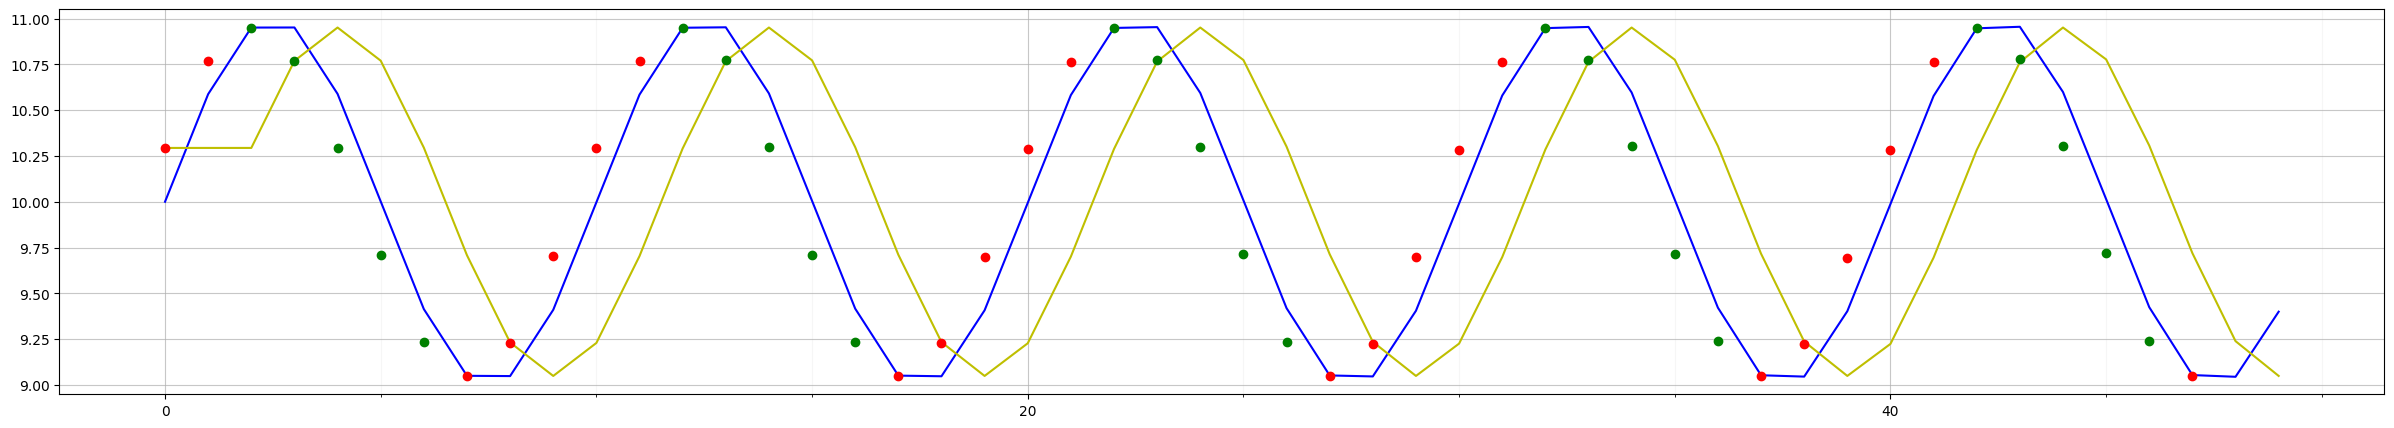

In [212]:
plt.rcParams["figure.figsize"] = (30,5)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0, len(stooq_vals)+1, 20)
minor_ticks = np.arange(0, len(stooq_vals)+1, 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.7)

limit = 60
plt.plot(stooq_vals[:limit], c="b")
plt.plot(predictions[:limit], c="y")
for i, operation in enumerate(operations):
  if operation > 0:
    plt.plot(i, operation, "go")
  if operation < 0:
    plt.plot(i, -operation, "ro")


# plt.plot(stooq_vals[batch_size:limit], c="b")
# plt.plot(result[batch_size:limit], c="y")

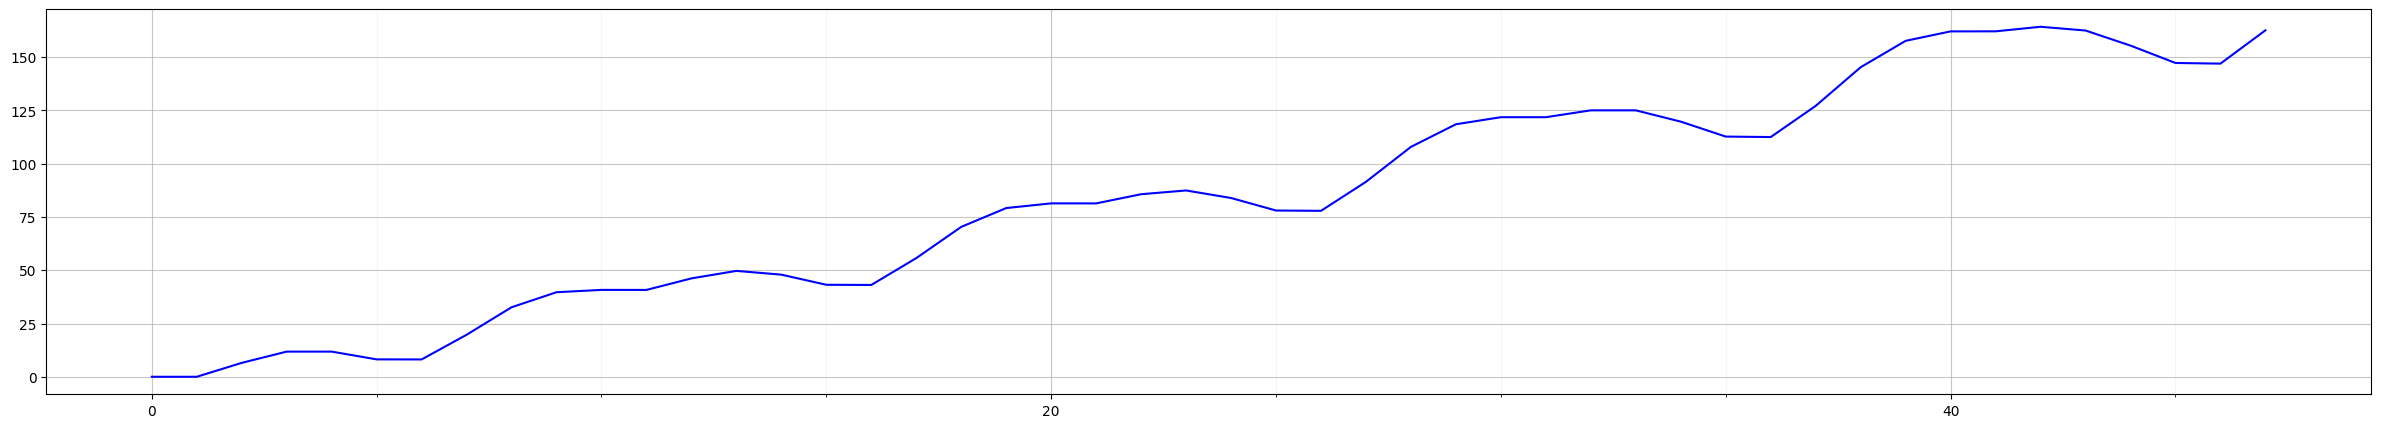

In [213]:
plt.rcParams["figure.figsize"] = (30,5)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0, len(stooq_vals)+1, 20)
minor_ticks = np.arange(0, len(stooq_vals)+1, 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.7)

limit = 60
plt.plot(money[:limit], c="b")

In [214]:
ccc = 50
stooq_vals = [(math.sin(i*3.14*10/ccc)+10) for i in range(ccc)]

max_val = [0, 0, 0]   # [money, batch_size, size_of_single_operation]

for i in range(1,10):
  for j in range(10,100,10):
    batch_size = i
    size_of_single_operation = j

    predictions = get_prediction(stooq_vals, batch_size)
    operations_b = get_operations(stooq_vals, predictions, batch_size, size_of_single_operation)   # [operation, money]
    money = [a[1] for a in operations_b][-1]

    if money > max_val[0]:
      max_val[0] = money
      max_val[1] = batch_size
      max_val[2] = size_of_single_operation

print(f"money         :   {max_val}")

money         :   [207.75573384111374, 7, 90]


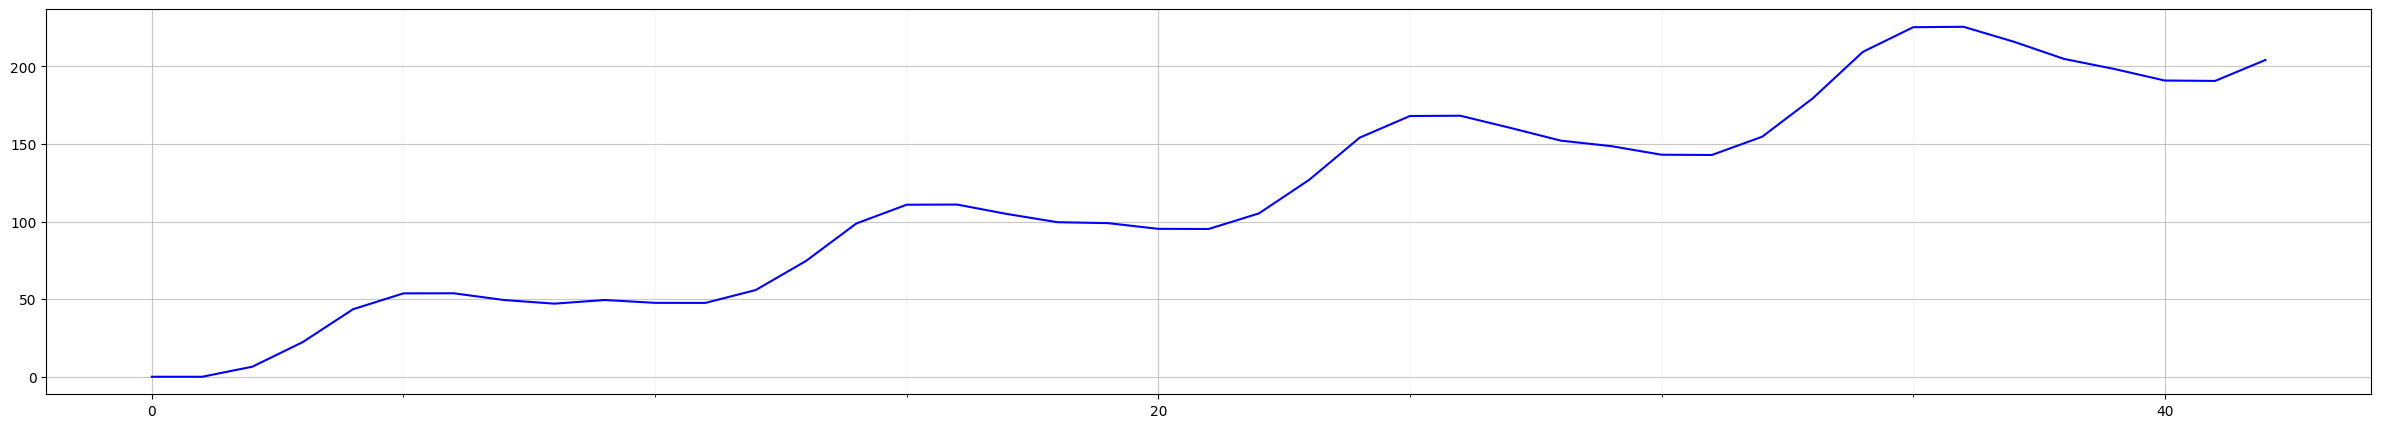

In [215]:
operations_b = get_operations(stooq_vals, predictions, 7, 90)   # [operation, money]
operations = [a[1] for a in operations_b]

plt.rcParams["figure.figsize"] = (30,5)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0, len(stooq_vals)+1, 20)
minor_ticks = np.arange(0, len(stooq_vals)+1, 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.7)

limit = 60
plt.plot(operations[:limit], c="b")